# I) Data collection

## i) Importing Necessary Python Libraries 

In [115]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


## ii) Importing Data

In [116]:
Data = pd.read_excel('Ecommerce_Sales_Prediction_Dataset.xlsx')
Data

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,2023-01-01 00:00:00,Sports,932.80,35.82,Occasional,6780.38,32
1,2023-02-01 00:00:00,Toys,569.48,3.60,Premium,6807.56,16
2,2023-03-01 00:00:00,Home Decor,699.68,3.56,Premium,3793.91,27
3,2023-04-01 00:00:00,Toys,923.27,0.61,Premium,9422.75,29
4,2023-05-01 00:00:00,Toys,710.17,47.83,Premium,1756.83,17
...,...,...,...,...,...,...,...
995,22-09-2025,Fashion,740.06,49.06,Regular,1890.83,34
996,23-09-2025,Electronics,517.10,28.48,Premium,8011.66,21
997,24-09-2025,Electronics,683.43,12.98,Occasional,3408.51,19
998,25-09-2025,Sports,51.26,21.85,Occasional,7335.62,26


# II- Data Cleaning

## i) Check Missing Values

In [117]:
missing_values = Data.isnull().sum()
missing_values

Date                0
Product_Category    0
Price               0
Discount            0
Customer_Segment    0
Marketing_Spend     0
Units_Sold          0
dtype: int64

*==> There is no missing value*

## ii) Duplicated Data

In [118]:
Dup_Data= Data.duplicated().sum()
Dup_Data

0

*==> There is no Duplicated Data*

## iii) Data Types

* Data types Detection

In [119]:
Types_Data = Data.dtypes
Types_Data

Date                 object
Product_Category     object
Price               float64
Discount            float64
Customer_Segment     object
Marketing_Spend     float64
Units_Sold            int64
dtype: object

*==> The 'date' variable should be of the date data type*

* Data types Modification

In [120]:
Data['Date'] = pd.to_datetime(Data['Date'], errors='coerce')
Data.dtypes

Date                datetime64[ns]
Product_Category            object
Price                      float64
Discount                   float64
Customer_Segment            object
Marketing_Spend            float64
Units_Sold                   int64
dtype: object

# III) Data Analysis

## i) Sales and Revenue Analysis

### 1) Units Sold

In [121]:
Units_Sold_per_Customer_Segment = Data.groupby('Customer_Segment')['Units_Sold'].sum().reset_index()
Units_Sold_per_Customer_Segment.sort_values(by=['Units_Sold'], ascending=False)

,Customer_Segment,Units_Sold
2,Regular,10222
0,Occasional,9842
1,Premium,9567


In [122]:
Units_Sold_per_Product_Category = Data.groupby('Product_Category')['Units_Sold'].sum().reset_index()
Units_Sold_per_Product_Category.sort_values(by=['Units_Sold'], ascending=False)

,Product_Category,Units_Sold
0,Electronics,6210
3,Sports,6125
4,Toys,6003
1,Fashion,5650
2,Home Decor,5643


#### Total Units Sold is :

In [123]:
Total_Units_Sold= Data['Units_Sold'].sum()
Total_Units_Sold

29631

### 2) Revenue

In [124]:
Data['Revenue']= Data.Price * Data.Units_Sold
Data

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,Revenue
0,2023-01-01,Sports,932.80,35.82,Occasional,6780.38,32,29849.60
1,2023-02-01,Toys,569.48,3.60,Premium,6807.56,16,9111.68
2,2023-03-01,Home Decor,699.68,3.56,Premium,3793.91,27,18891.36
3,2023-04-01,Toys,923.27,0.61,Premium,9422.75,29,26774.83
4,2023-05-01,Toys,710.17,47.83,Premium,1756.83,17,12072.89
...,...,...,...,...,...,...,...,...
995,2025-09-22,Fashion,740.06,49.06,Regular,1890.83,34,25162.04
996,2025-09-23,Electronics,517.10,28.48,Premium,8011.66,21,10859.10
997,2025-09-24,Electronics,683.43,12.98,Occasional,3408.51,19,12985.17
998,2025-09-25,Sports,51.26,21.85,Occasional,7335.62,26,1332.76


#### Total Revenue is :  

In [125]:
Revenue = Data['Revenue'].sum()
Revenue

15002484.56

### 3) Discounted Revenu

In [126]:
Data['Discount'] = Data['Discount'] / 100
Data['Discounted_Revenue']=( Data.Revenue * (1-Data.Discount)).round(1)
Data['Profit'] =( Data['Discounted_Revenue'] - Data['Marketing_Spend']).round(1)

Data

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,Revenue,Discounted_Revenue,Profit
0,2023-01-01,Sports,932.80,0.3582,Occasional,6780.38,32,29849.60,19157.5,12377.1
1,2023-02-01,Toys,569.48,0.0360,Premium,6807.56,16,9111.68,8783.7,1976.1
2,2023-03-01,Home Decor,699.68,0.0356,Premium,3793.91,27,18891.36,18218.8,14424.9
3,2023-04-01,Toys,923.27,0.0061,Premium,9422.75,29,26774.83,26611.5,17188.8
4,2023-05-01,Toys,710.17,0.4783,Premium,1756.83,17,12072.89,6298.4,4541.6
...,...,...,...,...,...,...,...,...,...,...
995,2025-09-22,Fashion,740.06,0.4906,Regular,1890.83,34,25162.04,12817.5,10926.7
996,2025-09-23,Electronics,517.10,0.2848,Premium,8011.66,21,10859.10,7766.4,-245.3
997,2025-09-24,Electronics,683.43,0.1298,Occasional,3408.51,19,12985.17,11299.7,7891.2
998,2025-09-25,Sports,51.26,0.2185,Occasional,7335.62,26,1332.76,1041.6,-6294.0


#### 3-1) Total Discounted Revenue:  

In [127]:
Discounted_Revenue = Data['Discounted_Revenue'].sum().round(1)
Discounted_Revenue

11238292.6

#### 3-2) Discounted_Revenue per Customer Segment

In [128]:
Dis_Rev_per_Customer_Segment = Data.groupby('Customer_Segment')['Discounted_Revenue'].sum().reset_index()
Dis_Rev_per_Customer_Segment.sort_values(by=['Discounted_Revenue'], ascending=False)

,Customer_Segment,Discounted_Revenue
0,Occasional,3914791.2
2,Regular,3805949.4
1,Premium,3517552.0


#### 3-3) Discounted Revenue per Product Category

In [129]:
Dis_Rev_per_Product_Category = Data.groupby('Product_Category')['Discounted_Revenue'].sum().reset_index()
Dis_Rev_per_Product_Category.sort_values(by=['Discounted_Revenue'], ascending=False)

,Product_Category,Discounted_Revenue
3,Sports,2403555.0
0,Electronics,2265784.7
2,Home Decor,2192501.2
1,Fashion,2188679.1
4,Toys,2187772.6


#### 3-4) Discounted_Revenue per Product Category per Customer Segment

In [130]:
Dis_Rev_per_Product_Category_per_Customer_Segment = Data.groupby(['Product_Category','Customer_Segment'])['Discounted_Revenue'].sum().reset_index()
Dis_Rev_per_Product_Category_per_Customer_Segment.sort_values(by=['Product_Category','Discounted_Revenue'], ascending=False)

,Product_Category,Customer_Segment,Discounted_Revenue
12,Toys,Occasional,775960.0
13,Toys,Premium,732562.6
14,Toys,Regular,679250.0
11,Sports,Regular,841826.9
10,Sports,Premium,829645.4
9,Sports,Occasional,732082.7
6,Home Decor,Occasional,867778.6
8,Home Decor,Regular,716574.5
7,Home Decor,Premium,608148.1
3,Fashion,Occasional,847477.4


### 6) KPIs :

#### Average Order Value (AOV)

In [131]:
AOV=(Discounted_Revenue/Data['Units_Sold'].sum()).round(1)
AOV

379.3

## ii) Marketing Performance Analysis

### 1) Marketing Total Matketing Spend

In [132]:
Total_Marketing_Spend = Data['Marketing_Spend'].sum().round(1)
Total_Marketing_Spend

4912830.2

### 2) Sales per Marketing Dirham

In [133]:
SMD= ( Discounted_Revenue/Data.Marketing_Spend.sum()).round(2)
SMD

2.29

### 3) Avg Marketing Spend Per Unit Per Product 

In [134]:
Data['Marketing_Spend_per_Unit'] = Data['Marketing_Spend'] / Data['Units_Sold']
avg_marketing_spend_per_unit = Data.groupby('Product_Category')['Marketing_Spend_per_Unit'].mean().reset_index()
avg_marketing_spend_per_unit

,Product_Category,Marketing_Spend_per_Unit
0,Electronics,181.036316
1,Fashion,176.067336
2,Home Decor,179.104795
3,Sports,168.942017
4,Toys,183.202207


## iv) Profitability Analysis

### 1) Gross Profit

In [135]:
Gross_Profit= Data['Profit'].sum().round(1)
Gross_Profit

6325461.4

### 2) Gross Margin

In [136]:
Gross_margin=(Gross_Profit/Discounted_Revenue).round(2)
Gross_margin

0.56

### 3)Profit per Customer Segment

In [137]:
Profit_per_Customer_Segment = Data.groupby('Customer_Segment')['Profit'].sum().reset_index()
Profit_per_Customer_Segment.sort_values(by=['Profit'], ascending=False)

,Customer_Segment,Profit
0,Occasional,2259686.3
2,Regular,2085222.9
1,Premium,1980552.2


### 4)Profit per Product Category per Customer Segment 

In [138]:
Profit_per_Product_Category_per_Customer_Segment = Data.groupby(['Product_Category','Customer_Segment'])['Profit'].sum().reset_index()
Profit_per_Product_Category_per_Customer_Segment.sort_values(by=['Product_Category','Profit'], ascending=False)

,Product_Category,Customer_Segment,Profit
13,Toys,Premium,405274.9
14,Toys,Regular,389421.0
12,Toys,Occasional,382528.5
10,Sports,Premium,510359.7
9,Sports,Occasional,466621.5
11,Sports,Regular,448325.3
6,Home Decor,Occasional,520599.7
8,Home Decor,Regular,410555.1
7,Home Decor,Premium,322620.3
3,Fashion,Occasional,533461.7


### 5)Profit per Customer Segment per Product Category

In [139]:
Profit_per_Customer_Segment_Product_Category = Data.groupby(['Customer_Segment','Product_Category'])['Profit'].sum().reset_index()
Profit_per_Customer_Segment_Product_Category.sort_values(by=['Customer_Segment', 'Profit'], ascending=False)

,Customer_Segment,Product_Category,Profit
10,Regular,Electronics,483370.4
13,Regular,Sports,448325.3
12,Regular,Home Decor,410555.1
14,Regular,Toys,389421.0
11,Regular,Fashion,353551.1
8,Premium,Sports,510359.7
9,Premium,Toys,405274.9
6,Premium,Fashion,380711.4
5,Premium,Electronics,361585.9
7,Premium,Home Decor,322620.3


## v) Data Correlation

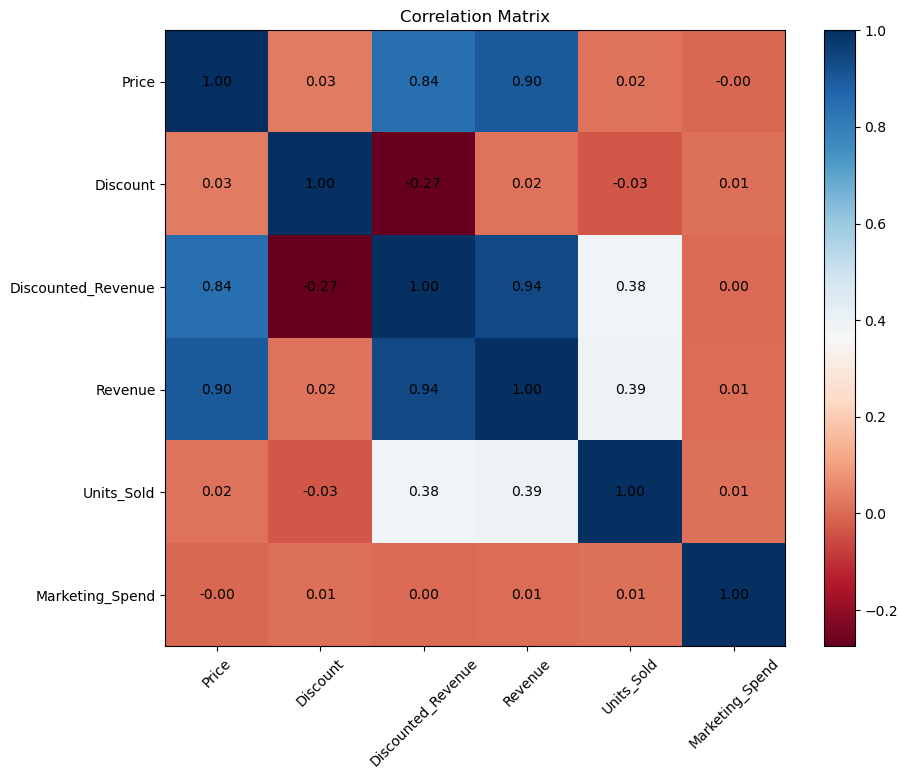

In [141]:
correlation_data = Data[['Price', 'Discount', 'Discounted_Revenue', 'Revenue', 'Units_Sold', 'Marketing_Spend']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8),edgecolor='Black')
plt.imshow(correlation_matrix, cmap='RdBu', interpolation= 'none', aspect='auto', alpha=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

# IV) Revenue and marketing spend Forecast

C:\Users\Moad Workstation\AppData\Local\Temp\ipykernel_17708\3755919274.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2026-01-31', periods=6, freq='M')


Revenue Forecast for the Next 6 Months:
            Electronics     Fashion  Home Decor      Sports        Toys
2026-01-31    12.687815  123.224289  233.307431   59.590514  153.048389
2026-02-28    66.301981  133.060979   87.145941  130.254923   68.546016
2026-03-31   117.134968  108.721116  163.574932   99.571322  134.111001
2026-04-30    38.099158  104.800766  215.291364  106.460667  159.370064
2026-05-31   120.453390   81.248846  149.159733  213.381092   94.172412
2026-06-30   107.171490  141.107201  166.660631  102.694933  127.366497

Marketing Spend Forecast for the Next 6 Months:
            Electronics      Fashion   Home Decor       Sports         Toys
2026-01-31  5068.350238  4847.130474  4940.663789  4748.776748  4953.665539
2026-02-28  5169.717243  4944.073083  5039.477065  4843.752283  5052.738850
2026-03-31  5271.084248  5041.015693  5138.290341  4938.727817  5151.812161
2026-04-30  5372.451252  5137.958302  5237.103617  5033.703352  5250.885472
2026-05-31  5473.818257  52

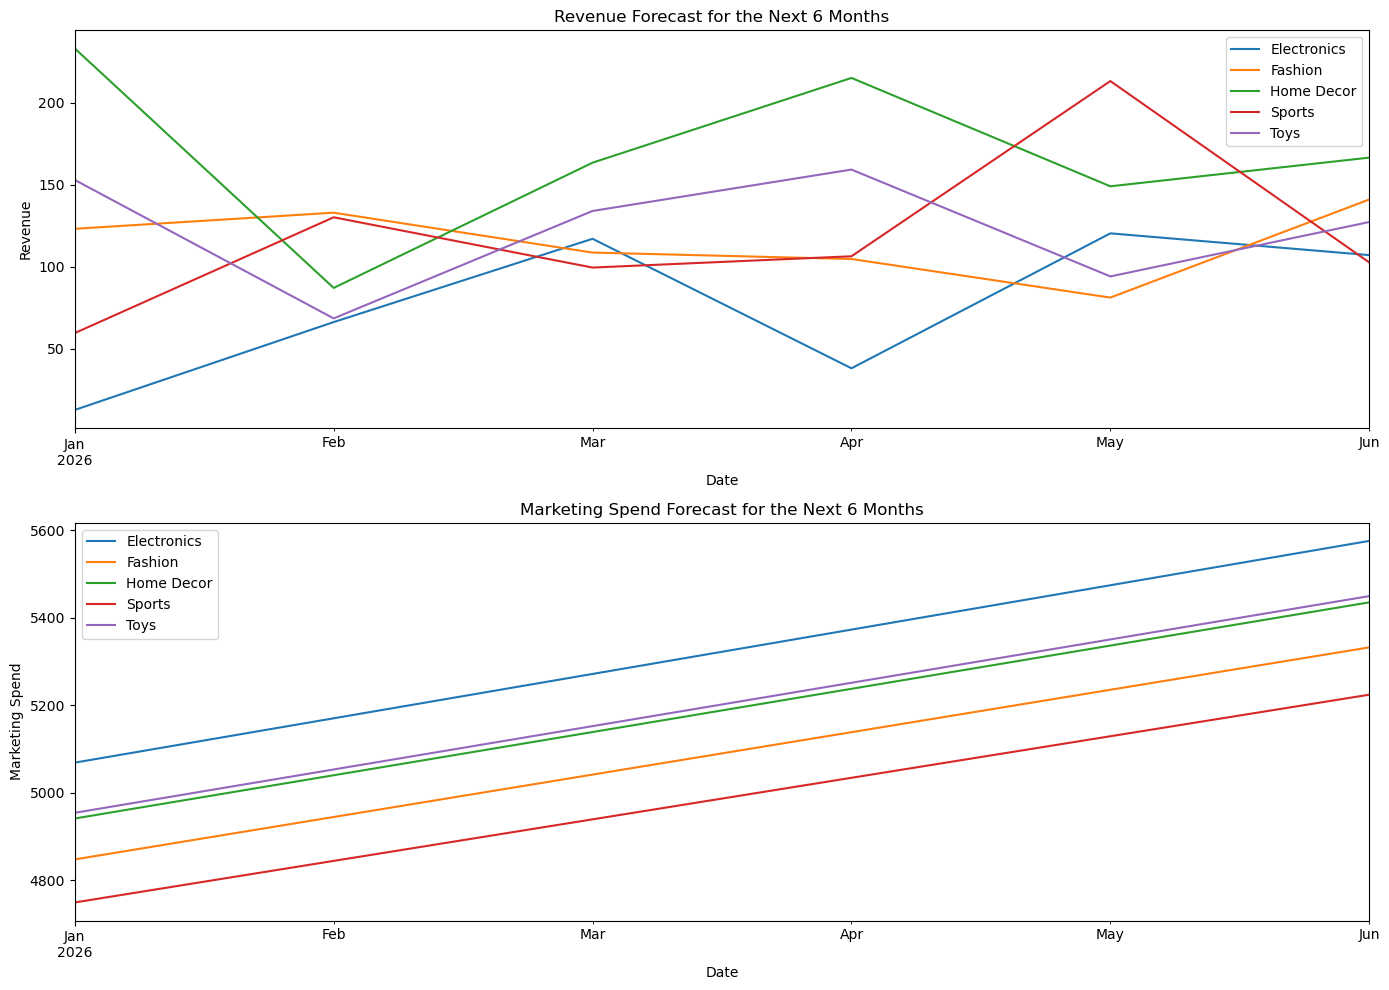

In [140]:
future_dates = pd.date_range(start='2026-01-31', periods=6, freq='M')

#Dictionaries to store the forecasts
revenue_forecast = {}
marketing_spend_forecast = {}

# Loop through each product category and generate the forecasts
for category in models.keys():
    model = models[category]

    revenue_forecast[category] = model.forecast(steps=6)
    
    marketing_spend_forecast[category] = np.linspace(Data[Data['Product_Category'] == category]['Marketing_Spend'].mean(), 
                                                     Data[Data['Product_Category'] == category]['Marketing_Spend'].mean() * 1.1, num=6)


revenue_forecast_df = pd.DataFrame(revenue_forecast, index=future_dates)
marketing_spend_forecast_df = pd.DataFrame(marketing_spend_forecast, index=future_dates)

# Display the forecasts
print("Revenue Forecast for the Next 6 Months:")
print(revenue_forecast_df)

print("\nMarketing Spend Forecast for the Next 6 Months:")
print(marketing_spend_forecast_df)
# Plot the forecasts
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

#Revenue forecast
revenue_forecast_df.plot(ax=ax[0])
ax[0].set_title('Revenue Forecast for the Next 6 Months')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Revenue')

#Marketing spend forecast
marketing_spend_forecast_df.plot(ax=ax[1])
ax[1].set_title('Marketing Spend Forecast for the Next 6 Months')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Marketing Spend')

plt.tight_layout()
plt.show()